# Signal Processing Project

## Abstract

Banana fraud, an unexpected yet significant issue, has been impacting the global fruit market. This project aims to tackle this problem by analyzing the chromatograms of banana samples to detect any inconsistencies. We employ the KMeans clustering algorithm to group similar chromatograms together, aiding in the identification of potential outliers. Preliminary results show promising accuracy in distinguishing genuine from fraudulent samples, though . Future work will focus on refining the model and expanding its applicability to other types of fruit fraud to fight against food fraud.

## Introduction

"Despite  they  may  not  look  like,  fruit  markets  are  very  competitive. Nowadays, the  authenticity  of Plátano de Canarias, a banana variety that hasa higher price due to its Protected Designation of Origin (PDO), is a significant concern. Fraudulent labelling of cheaper bananas coming from other countries occurs,  undermining market  integrity  and  consumer  trust. To  combat  this, optimized analytical methods are employed to distinguish genuine Plátano de Canarias from other bananas. In this regards, Liquid  Chromatography is  a common analytical  technique  used  for  this  purpose.  It  allows  for  the separation, identification, and quantification of the unique chemical compounds present in the food. 

For this project, samples from various bananas have been analysed to identify markers indicative of their true origin. Four different parts have been analysed: pulp, peel, flower tip, and neck. The focus will  be  on analysing the  chromatography  data  to  detect  the  presence  of  specific  compounds  or markers that are characteristic of the Plátano de Canarias. The process involves also examining how sample preparation techniques, suchas concentrating the extracts of the pulp, peel, flower tip, and neck, affect the detection of these markers. This evaluation will help in understanding how to enhance the sensitivity of the tests, ensuring the accurate identification of the Plátano de Canarias.

In  this  exercise  you  need  to  do what  the analytical  chemistry team  at the Food  Safety  Authority of Ireland (FSAI) do,by examining samples from 10 bananas (labelled 1 to 10). In some of these bananas which arrived at the Dublin port, there is a suspicion of fraudulent labelling. Your goal is to analyse the provided samples to determine if any of the bananas have been labelled wrong in purpose to obtain more benefit." taken from the project instructions.

## Materials and methods

### Data description

The data is separated into two categories: treated and untreated samples. We also have a series of 10 bananas that were used as a control group. The data is stored in a txt file (separated with tabulations) with two float columns: time and intensity. 

We will later ignore the time column, as it is not relevant for our analysis (replaced by a default index).

We need for every dataframe to convert the content to float, as it is stored as a string and in an particular notation (e.g. 1,000.000).

### Modules import

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from collections import Counter

### Data importing methods

In [98]:
def load_data(path):
    """
    Load data from a tab-separated CSV file.

    The function reads a CSV file, replaces commas with nothing, and converts the data to float type.

    Parameters:
    path (str): The path to the CSV file.

    Returns:
    dataframe (pd.DataFrame): The loaded data as a pandas DataFrame.
    """
    dataframe = pd.read_csv(path, sep="\t", header=None)
    dataframe = dataframe.replace(',', '', regex=True).astype(float)
    return dataframe

In [99]:
def normalize_data(dataframe):
    """
    Normalize the data in the given pandas DataFrame.

    The function uses the MinMaxScaler from sklearn to normalize the data. 
    It transforms the data such that its distribution will have a minimum of 0 and a maximum of 1.
    It then returns the second column of the normalized data.

    Parameters:
    dataframe (pd.DataFrame): The pandas DataFrame to normalize.

    Returns:
    normalized_dataframe (pd.DataFrame): The normalized data as a pandas DataFrame.
    """
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(dataframe)
    normalized_dataframe = pd.DataFrame(normalized_data, columns=dataframe.columns)
    normalized_dataframe = normalized_dataframe.iloc[:,1]
    return normalized_dataframe

In [100]:
def average_signals(dataframe1, dataframe2, dataframe3):
    """
    Calculate the average of the signals from three pandas DataFrames.

    The function concatenates the three input DataFrames column-wise, calculates the mean of each row, 
    and returns a DataFrame containing these means.

    Parameters:
    dataframe1, dataframe2, dataframe3 (pd.DataFrame): The pandas DataFrames to average.

    Returns:
    combined (pd.Series): A pandas Series containing the mean of each row from the input DataFrames.
    """
    combined = pd.concat([dataframe1, dataframe2, dataframe3], axis=1)
    combined['mean'] = combined.mean(axis=1)
    combined = combined['mean']
    return combined

In [101]:
def combine_signals(dataframes):
    """
    Combine the signals from a list of pandas DataFrames.

    The function concatenates the input DataFrames column-wise and returns the combined DataFrame.

    Parameters:
    dataframes (list of pd.DataFrame): The list of pandas DataFrames to combine.

    Returns:
    combined (pd.DataFrame): The combined DataFrame.
    """
    combined = pd.concat([dataframe for dataframe in dataframes], axis=1, ignore_index=True)
    return combined

In [102]:
def plot_4_signals(dataframe1, dataframe2, dataframe3, dataframe4, title1, title2, title3, title4, g_title):
    """
    Plot four signals from four pandas DataFrames.

    The function creates a 2x2 subplot and plots each DataFrame in a separate subplot. 
    Each subplot is given a title, and the entire figure is also given a title.

    Parameters:
    dataframe1, dataframe2, dataframe3, dataframe4 (pd.DataFrame): The pandas DataFrames to plot.
    title1, title2, title3, title4 (str): The titles for the subplots.
    g_title (str): The title for the entire figure.

    Returns:
    None
    """
    fig, axs = plt.subplots(2, 2, figsize=(14, 8))
    fig.suptitle(g_title, fontsize=20)
    axs[0, 0].plot(dataframe1)
    axs[0, 0].set_title(title1)

    axs[0, 1].plot(dataframe2)
    axs[0, 1].set_title(title2)

    axs[1, 0].plot(dataframe3)
    axs[1, 0].set_title(title3)
    axs[1, 0].set_xlabel('Index')

    axs[1, 1].plot(dataframe4)
    axs[1, 1].set_title(title4)
    axs[1, 1].set_xlabel('Index')

    plt.show()

### Materials

In this section, we are going to import the data using the previous methods. 

For each banana sample, we have 4 different parts: pulp, peel, flower tip, and neck. We will import the data for each of these parts and plot each chromatogram to have a visual representation of the data.

We will repeat this work for each of the 10 bananas (treated samples as well as untreated ones).

#### Banana 1

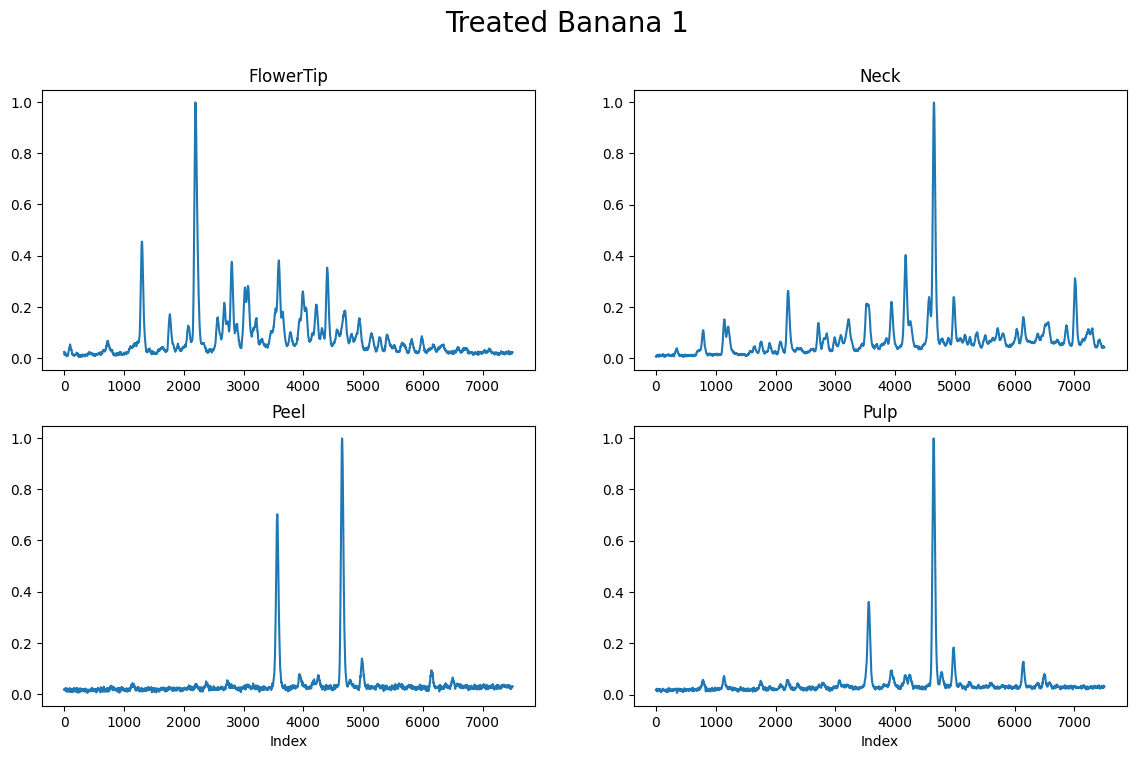

In [103]:
banana1_flowertip_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/1-FlowerTip-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/1-FlowerTip-2.txt")),
    normalize_data(load_data("../data/Treated_samples/1-FlowerTip-3.txt")))

banana1_neck_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/1-Neck-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/1-Neck-2.txt")),
    normalize_data(load_data("../data/Treated_samples/1-Neck-3.txt")))

banana1_peel_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/1-Peel-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/1-Peel-2.txt")),
    normalize_data(load_data("../data/Treated_samples/1-Peel-3.txt")))

banana1_pulp_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/1-Pulp-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/1-Pulp-2.txt")),
    normalize_data(load_data("../data/Treated_samples/1-Pulp-3.txt")))

plot_4_signals(banana1_flowertip_treated, banana1_neck_treated, banana1_peel_treated, banana1_pulp_treated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Treated Banana 1')

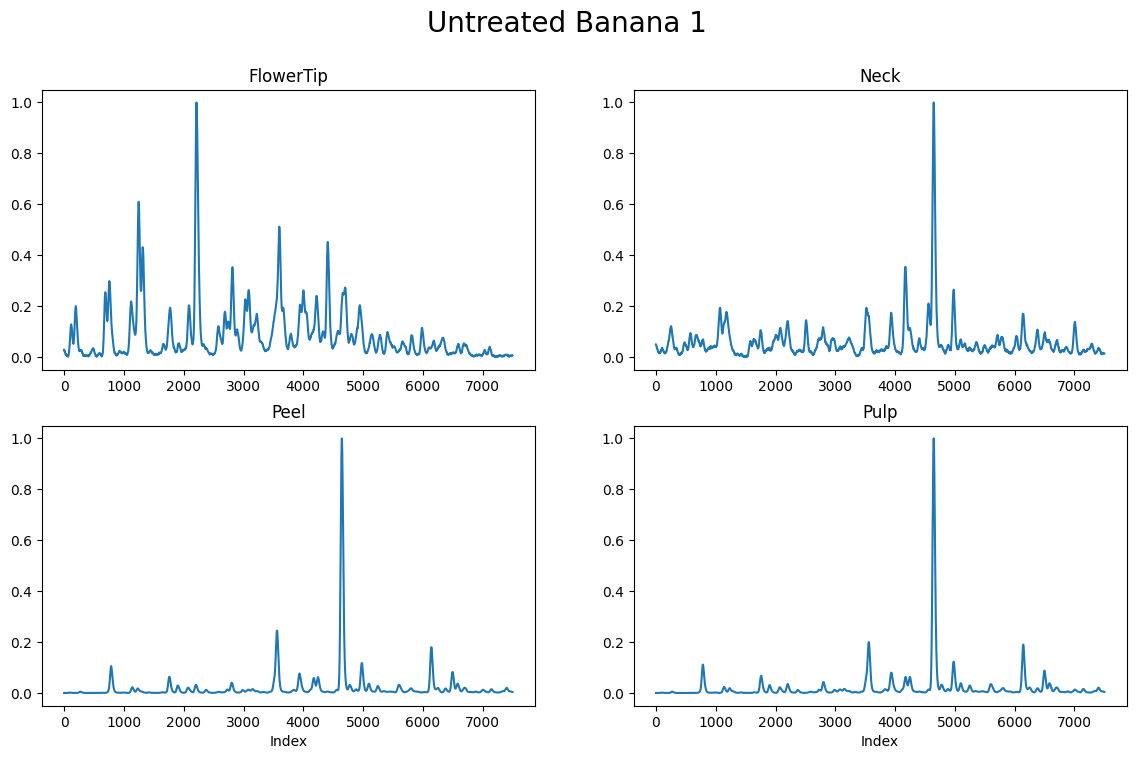

In [104]:
banana1_flowertip_untreated = normalize_data(load_data("../data/Untreated_samples/1-FlowerTip.txt"))
banana1_neck_untreated = normalize_data(load_data("../data/Untreated_samples/1-Neck.txt"))
banana1_peel_untreated = normalize_data(load_data("../data/Untreated_samples/1-Peel.txt"))
banana1_pulp_untreated = normalize_data(load_data("../data/Untreated_samples/1-Pulp.txt"))

plot_4_signals(banana1_flowertip_untreated, banana1_neck_untreated, banana1_peel_untreated, banana1_pulp_untreated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Untreated Banana 1')

#### Banana 2

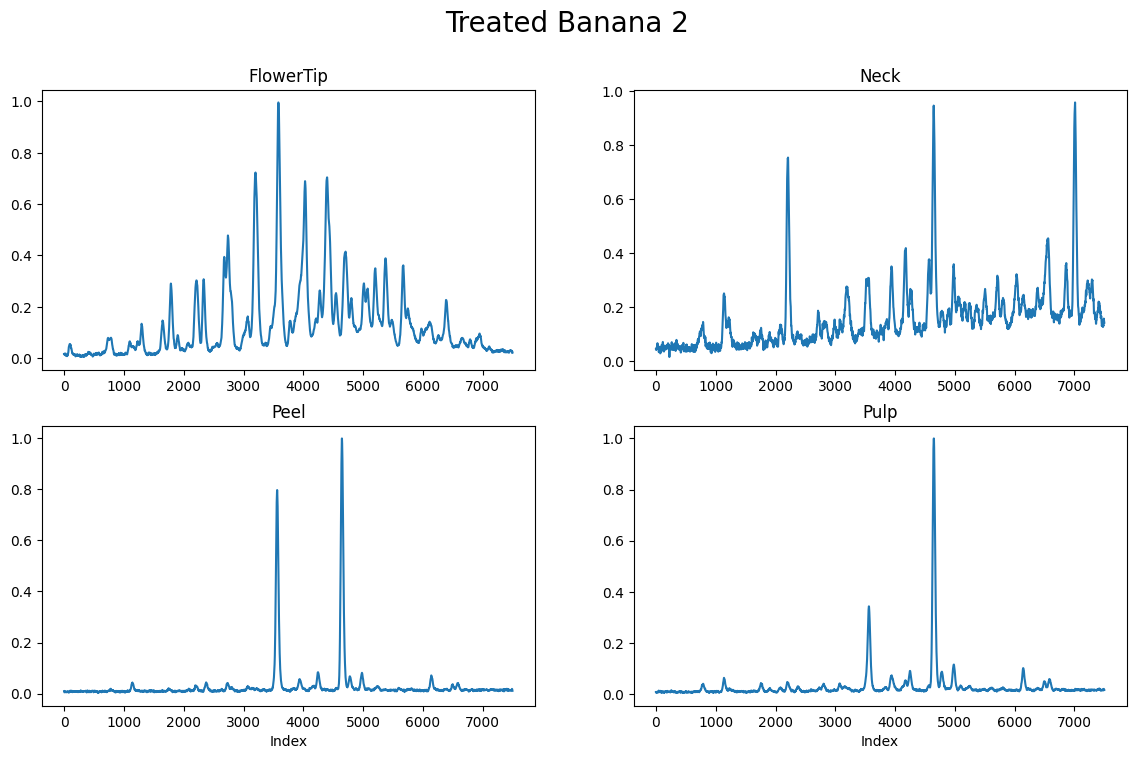

In [105]:
banana2_flowertip_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/2-FlowerTip-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/2-FlowerTip-2.txt")),
    normalize_data(load_data("../data/Treated_samples/2-FlowerTip-3.txt")))

banana2_neck_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/2-Neck-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/2-Neck-2.txt")),
    normalize_data(load_data("../data/Treated_samples/2-Neck-3.txt")))

banana2_peel_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/2-Peel-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/2-Peel-2.txt")),
    normalize_data(load_data("../data/Treated_samples/2-Peel-3.txt")))

banana2_pulp_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/2-Pulp-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/2-Pulp-2.txt")),
    normalize_data(load_data("../data/Treated_samples/2-Pulp-3.txt")))

plot_4_signals(banana2_flowertip_treated, banana2_neck_treated, banana2_peel_treated, banana2_pulp_treated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Treated Banana 2')

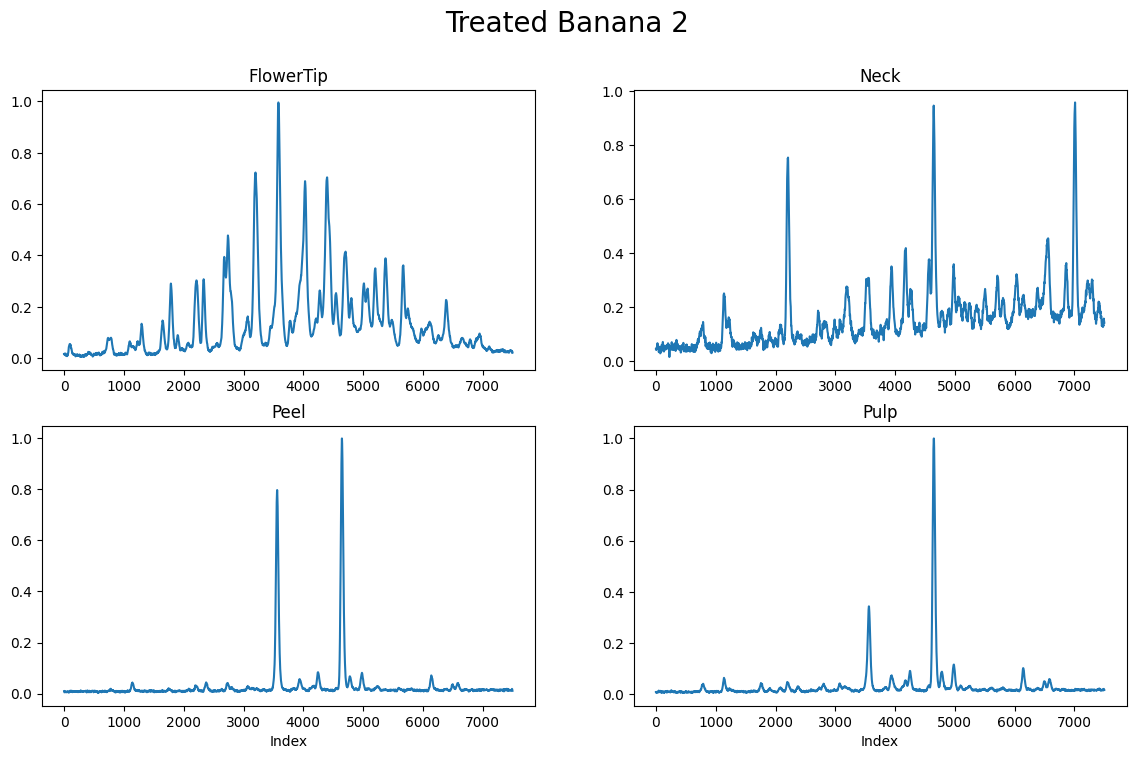

In [106]:
banana2_flowertip_untreated = normalize_data(load_data("../data/Untreated_samples/2-FlowerTip.txt"))
banana2_neck_untreated = normalize_data(load_data("../data/Untreated_samples/2-Neck.txt"))
banana2_peel_untreated = normalize_data(load_data("../data/Untreated_samples/2-Peel.txt"))
banana2_pulp_untreated = normalize_data(load_data("../data/Untreated_samples/2-Pulp.txt"))

plot_4_signals(banana2_flowertip_treated, banana2_neck_treated, banana2_peel_treated, banana2_pulp_treated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Treated Banana 2')

#### Banana 3

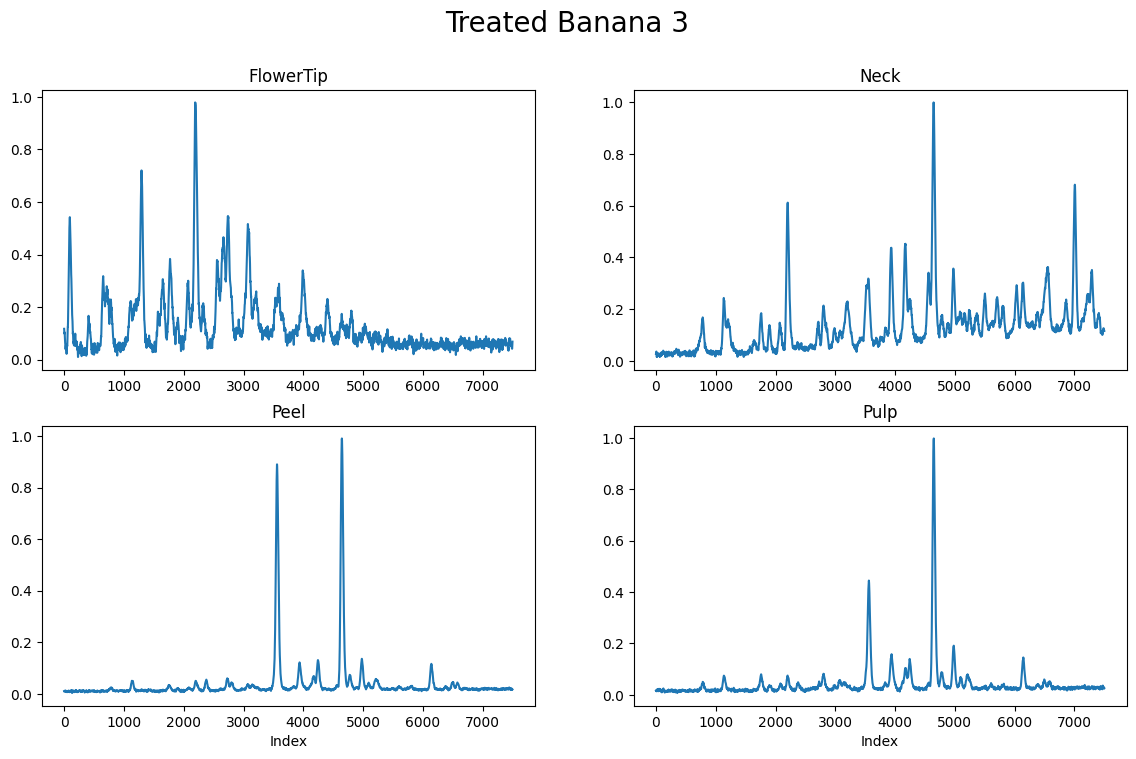

In [107]:
banana3_flowertip_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/3-FlowerTip-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/3-FlowerTip-2.txt")),
    normalize_data(load_data("../data/Treated_samples/3-FlowerTip-3.txt")))

banana3_neck_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/3-Neck-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/3-Neck-2.txt")),
    normalize_data(load_data("../data/Treated_samples/3-Neck-3.txt")))

banana3_peel_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/3-Peel-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/3-Peel-2.txt")),
    normalize_data(load_data("../data/Treated_samples/3-Peel-3.txt")))

banana3_pulp_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/3-Pulp-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/3-Pulp-2.txt")),
    normalize_data(load_data("../data/Treated_samples/3-Pulp-3.txt")))

plot_4_signals(banana3_flowertip_treated, banana3_neck_treated, banana3_peel_treated, banana3_pulp_treated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Treated Banana 3')

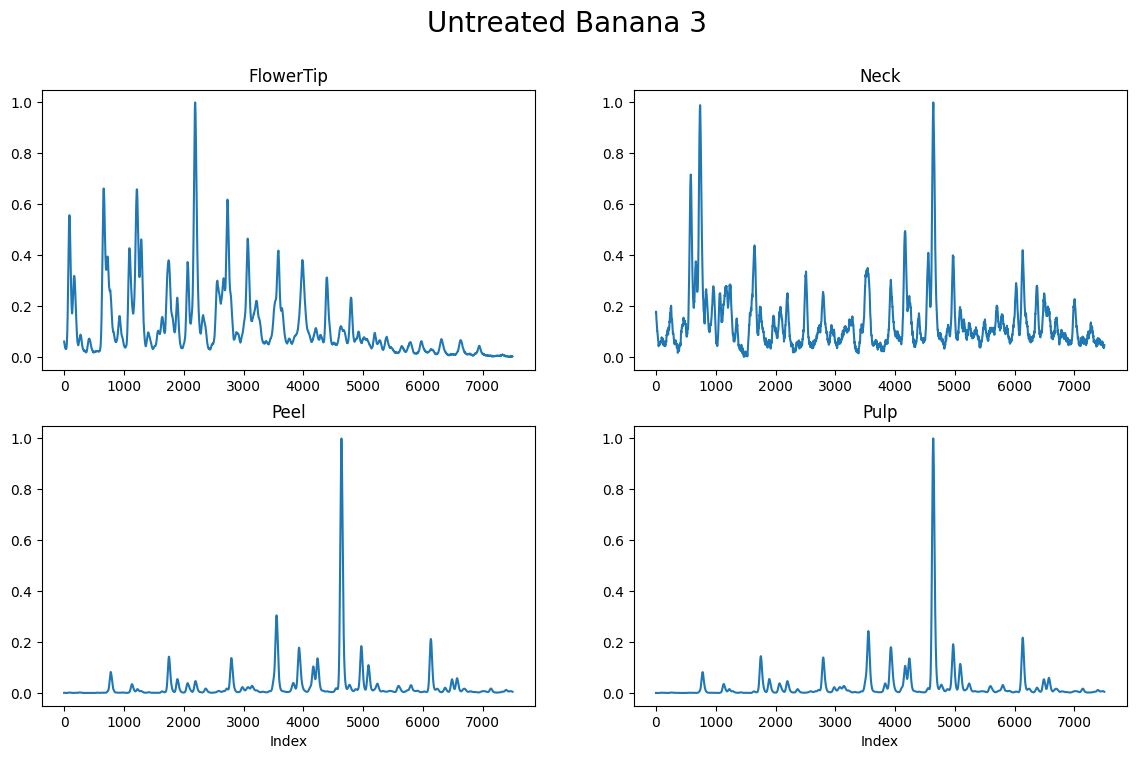

In [108]:
banana3_flowertip_untreated = normalize_data(load_data("../data/Untreated_samples/3-FlowerTip.txt"))
banana3_neck_untreated = normalize_data(load_data("../data/Untreated_samples/3-Neck.txt"))
banana3_peel_untreated = normalize_data(load_data("../data/Untreated_samples/3-Peel.txt"))
banana3_pulp_untreated = normalize_data(load_data("../data/Untreated_samples/3-Pulp.txt"))

plot_4_signals(banana3_flowertip_untreated, banana3_neck_untreated, banana3_peel_untreated, banana3_pulp_untreated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Untreated Banana 3')

#### Banana 4

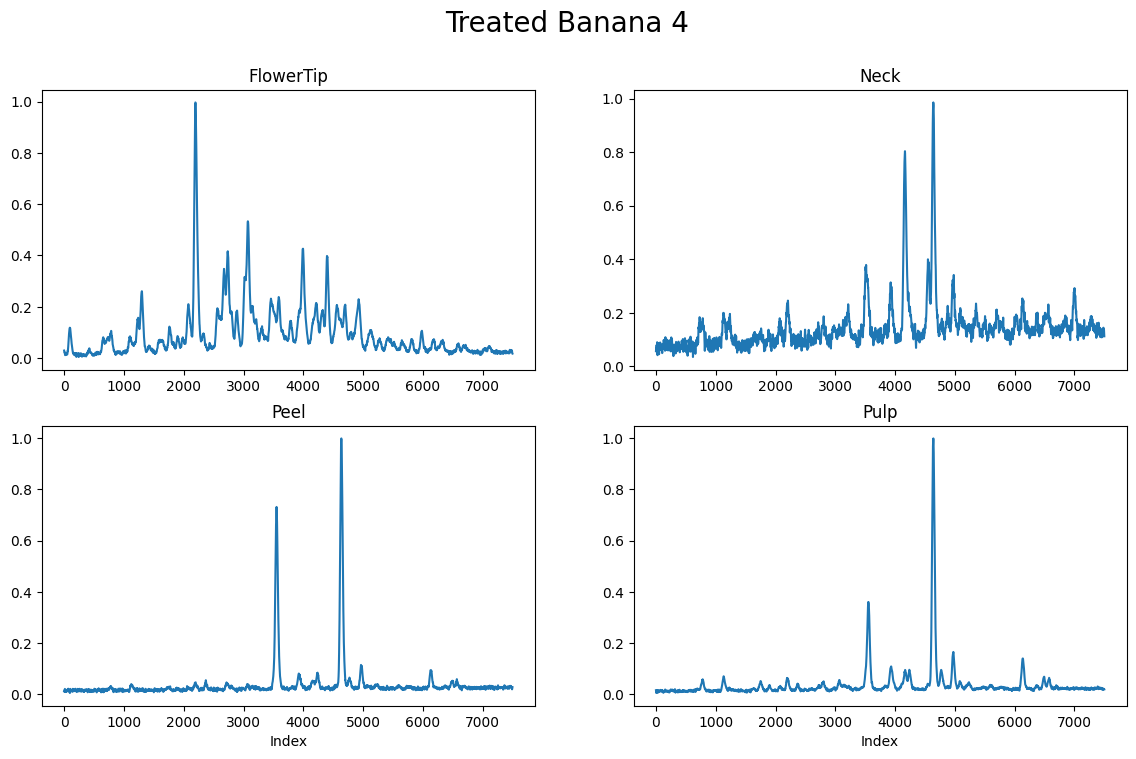

In [109]:
banana4_flowertip_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/4-FlowerTip-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/4-FlowerTip-2.txt")),
    normalize_data(load_data("../data/Treated_samples/4-FlowerTip-3.txt")))

banana4_neck_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/4-Neck-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/4-Neck-2.txt")),
    normalize_data(load_data("../data/Treated_samples/4-Neck-3.txt")))

banana4_peel_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/4-Peel-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/4-Peel-2.txt")),
    normalize_data(load_data("../data/Treated_samples/4-Peel-3.txt")))

banana4_pulp_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/4-Pulp-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/4-Pulp-2.txt")),
    normalize_data(load_data("../data/Treated_samples/4-Pulp-3.txt")))

plot_4_signals(banana4_flowertip_treated, banana4_neck_treated, banana4_peel_treated, banana4_pulp_treated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Treated Banana 4')

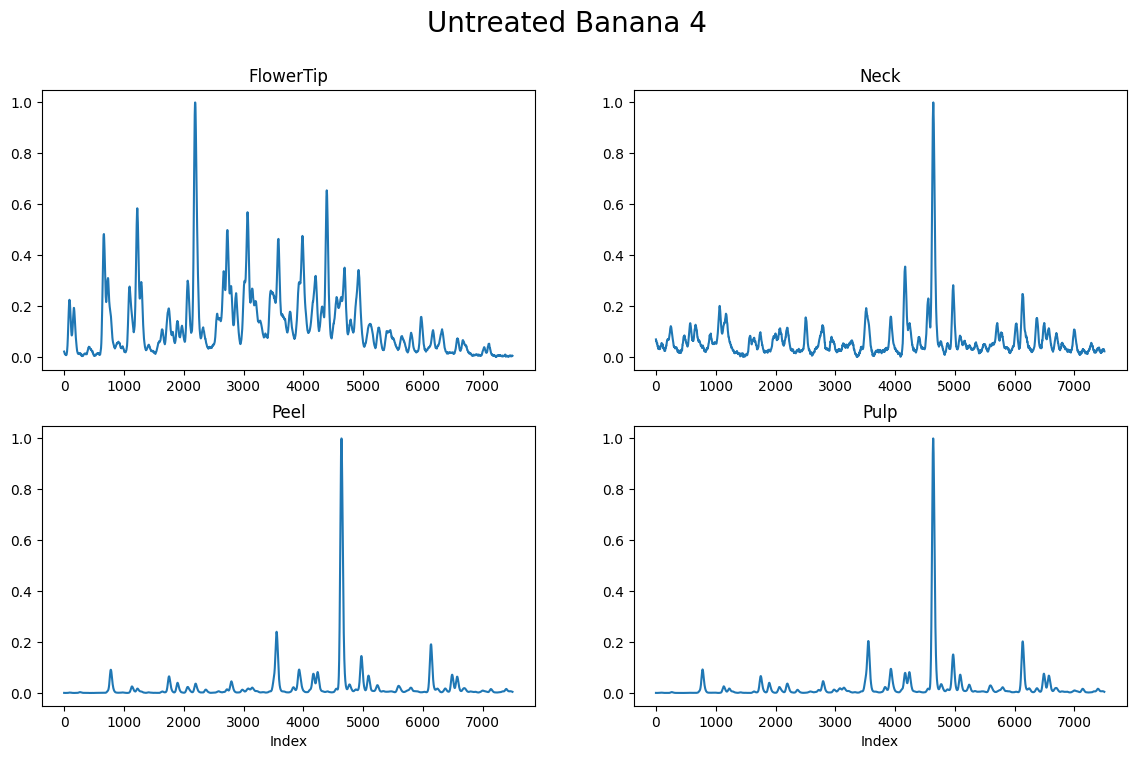

In [110]:
banana4_flowertip_untreated = normalize_data(load_data("../data/Untreated_samples/4-FlowerTip.txt"))
banana4_neck_untreated = normalize_data(load_data("../data/Untreated_samples/4-Neck.txt"))
banana4_peel_untreated = normalize_data(load_data("../data/Untreated_samples/4-Peel.txt"))
banana4_pulp_untreated = normalize_data(load_data("../data/Untreated_samples/4-Pulp.txt"))

plot_4_signals(banana4_flowertip_untreated, banana4_neck_untreated, banana4_peel_untreated, banana4_pulp_untreated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Untreated Banana 4')

#### Banana 5

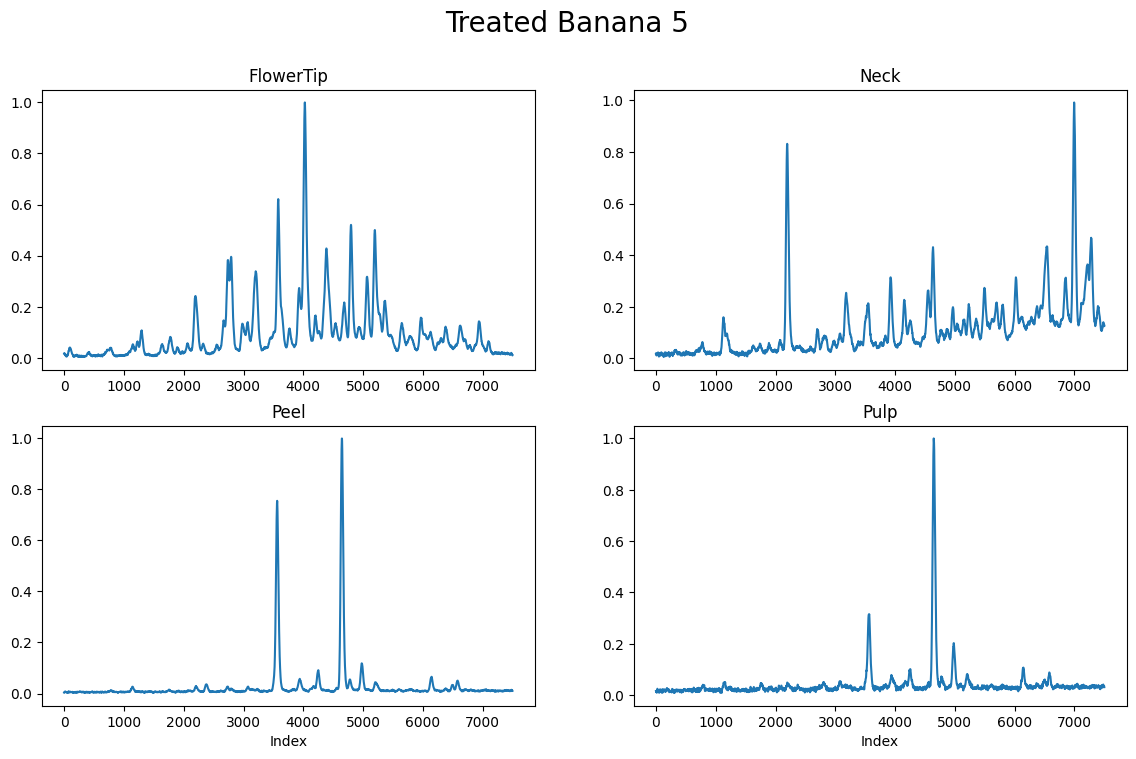

In [111]:
banana5_flowertip_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/5-FlowerTip-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/5-FlowerTip-2.txt")),
    normalize_data(load_data("../data/Treated_samples/5-FlowerTip-3.txt")))

banana5_neck_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/5-Neck-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/5-Neck-2.txt")),
    normalize_data(load_data("../data/Treated_samples/5-Neck-3.txt")))

banana5_peel_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/5-Peel-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/5-Peel-2.txt")),
    normalize_data(load_data("../data/Treated_samples/5-Peel-3.txt")))

banana5_pulp_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/5-Pulp-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/5-Pulp-2.txt")),
    normalize_data(load_data("../data/Treated_samples/5-Pulp-3.txt")))

plot_4_signals(banana5_flowertip_treated, banana5_neck_treated, banana5_peel_treated, banana5_pulp_treated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Treated Banana 5')

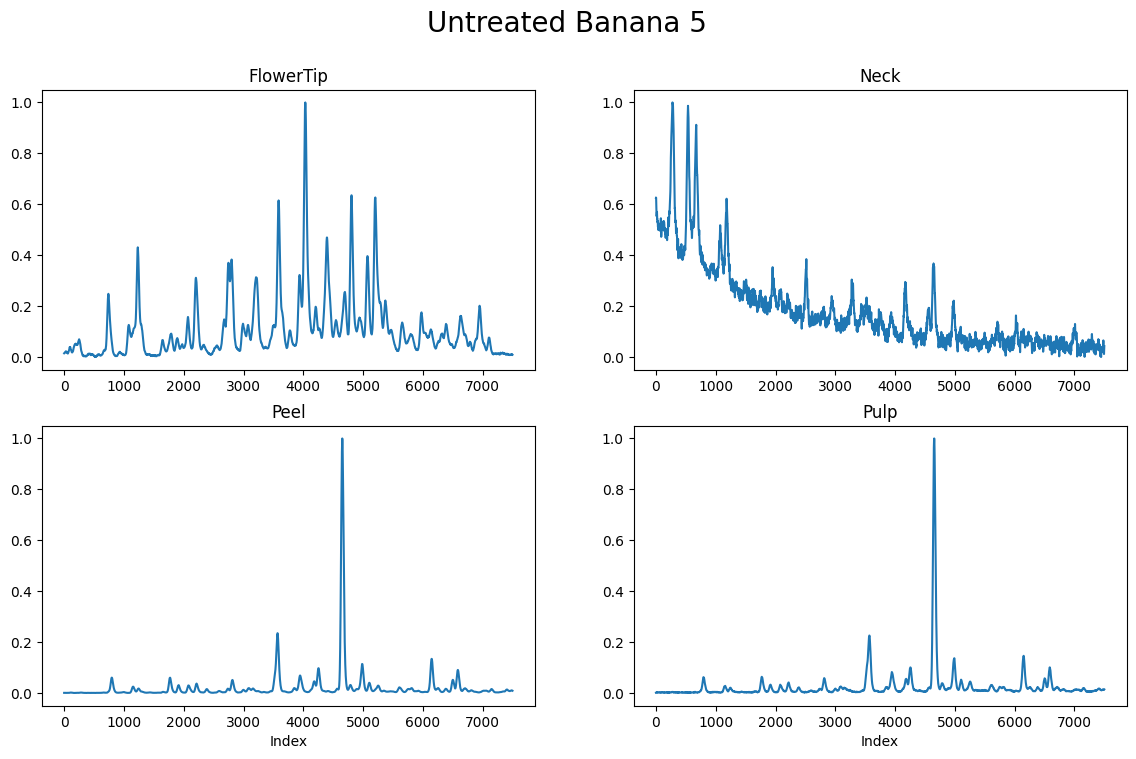

In [112]:
banana5_flowertip_untreated = normalize_data(load_data("../data/Untreated_samples/5-FlowerTip.txt"))
banana5_neck_untreated = normalize_data(load_data("../data/Untreated_samples/5-Neck.txt"))
banana5_peel_untreated = normalize_data(load_data("../data/Untreated_samples/5-Peel.txt"))
banana5_pulp_untreated = normalize_data(load_data("../data/Untreated_samples/5-Pulp.txt"))

plot_4_signals(banana5_flowertip_untreated, banana5_neck_untreated, banana5_peel_untreated, banana5_pulp_untreated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Untreated Banana 5')

#### Banana 6

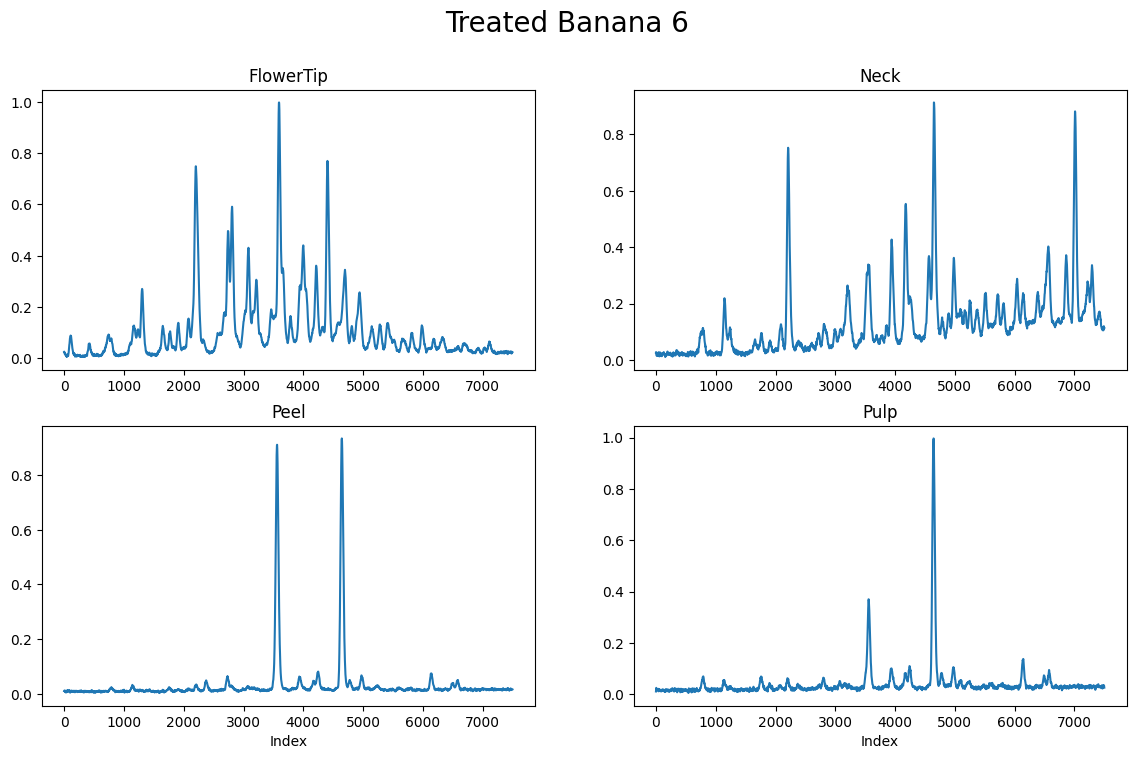

In [113]:
banana6_flowertip_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/6-FlowerTip-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/6-FlowerTip-2.txt")),
    normalize_data(load_data("../data/Treated_samples/6-FlowerTip-3.txt")))

banana6_neck_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/6-Neck-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/6-Neck-2.txt")),
    normalize_data(load_data("../data/Treated_samples/6-Neck-3.txt")))

banana6_peel_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/6-Peel-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/6-Peel-2.txt")),
    normalize_data(load_data("../data/Treated_samples/6-Peel-3.txt")))

banana6_pulp_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/6-Pulp-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/6-Pulp-2.txt")),
    normalize_data(load_data("../data/Treated_samples/6-Pulp-3.txt")))

plot_4_signals(banana6_flowertip_treated, banana6_neck_treated, banana6_peel_treated, banana6_pulp_treated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Treated Banana 6')

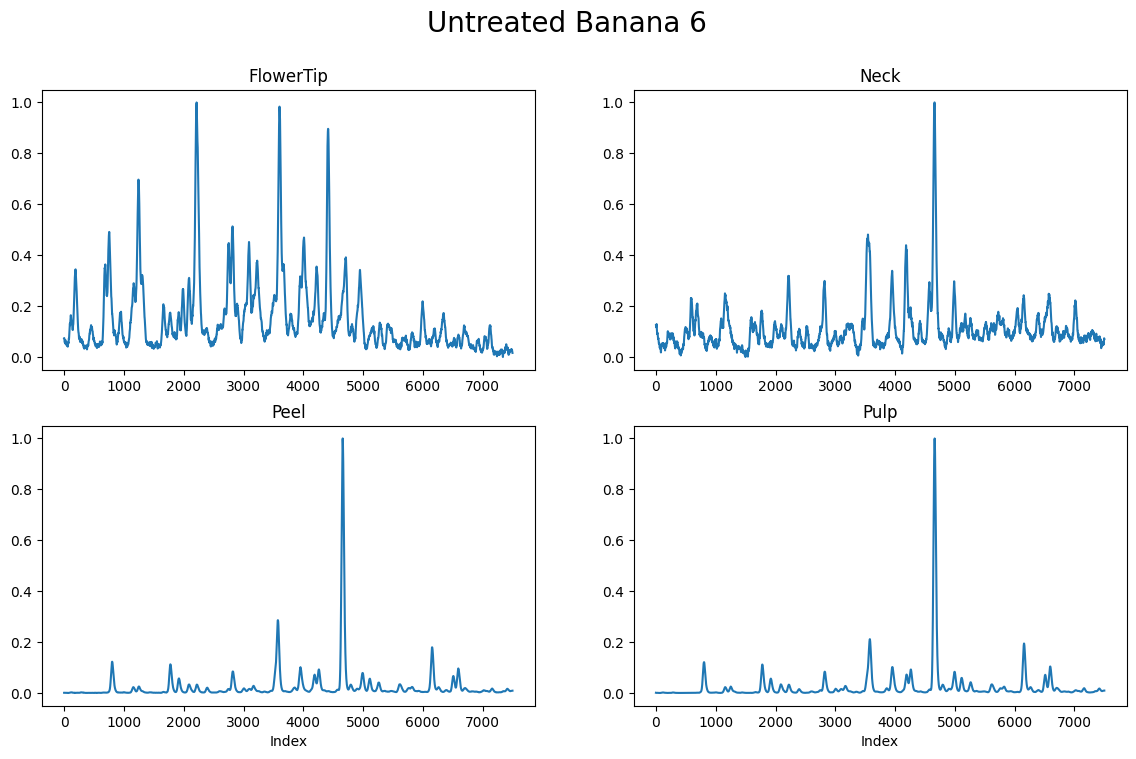

In [114]:
banana6_flowertip_untreated = normalize_data(load_data("../data/Untreated_samples/6-FlowerTip.txt"))
banana6_neck_untreated = normalize_data(load_data("../data/Untreated_samples/6-Neck.txt"))
banana6_peel_untreated = normalize_data(load_data("../data/Untreated_samples/6-Peel.txt"))
banana6_pulp_untreated = normalize_data(load_data("../data/Untreated_samples/6-Pulp.txt"))

plot_4_signals(banana6_flowertip_untreated, banana6_neck_untreated, banana6_peel_untreated, banana6_pulp_untreated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Untreated Banana 6')

#### Banana 7

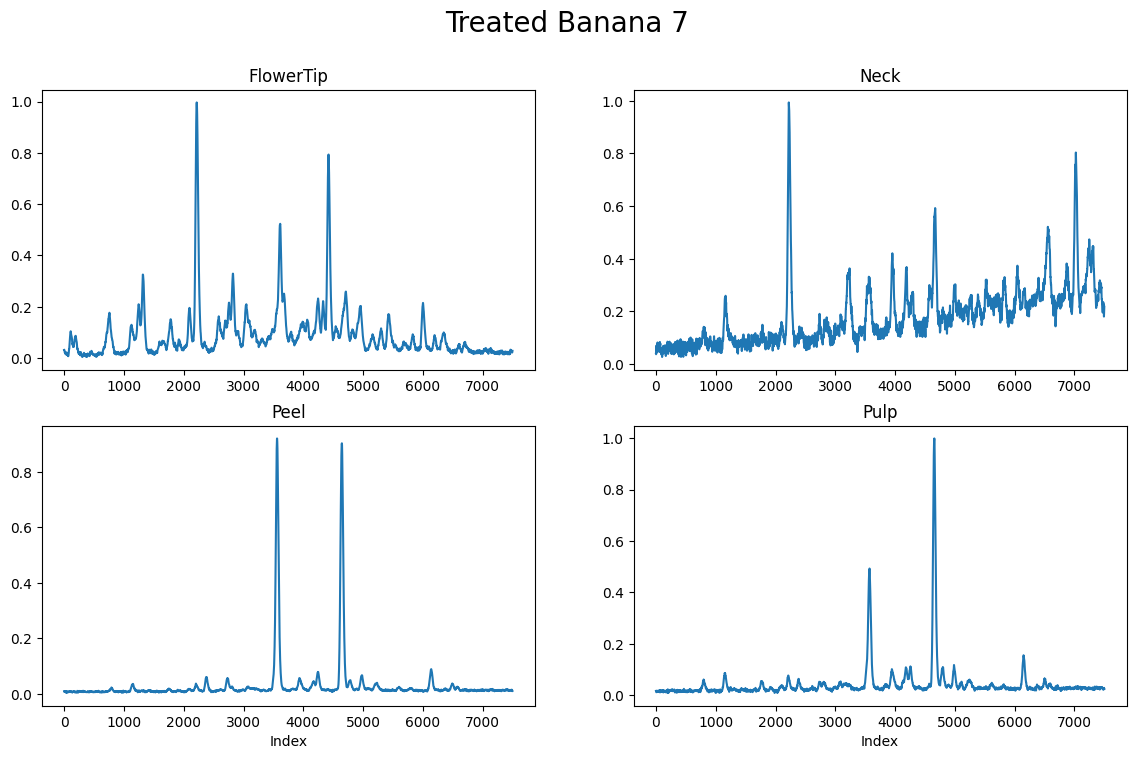

In [115]:
banana7_flowertip_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/7-FlowerTip-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/7-FlowerTip-2.txt")),
    normalize_data(load_data("../data/Treated_samples/7-FlowerTip-3.txt")))

banana7_neck_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/7-Neck-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/7-Neck-2.txt")),
    normalize_data(load_data("../data/Treated_samples/7-Neck-3.txt")))

banana7_peel_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/7-Peel-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/7-Peel-2.txt")),
    normalize_data(load_data("../data/Treated_samples/7-Peel-3.txt")))

banana7_pulp_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/7-Pulp-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/7-Pulp-2.txt")),
    normalize_data(load_data("../data/Treated_samples/7-Pulp-3.txt")))

plot_4_signals(banana7_flowertip_treated, banana7_neck_treated, banana7_peel_treated, banana7_pulp_treated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Treated Banana 7')

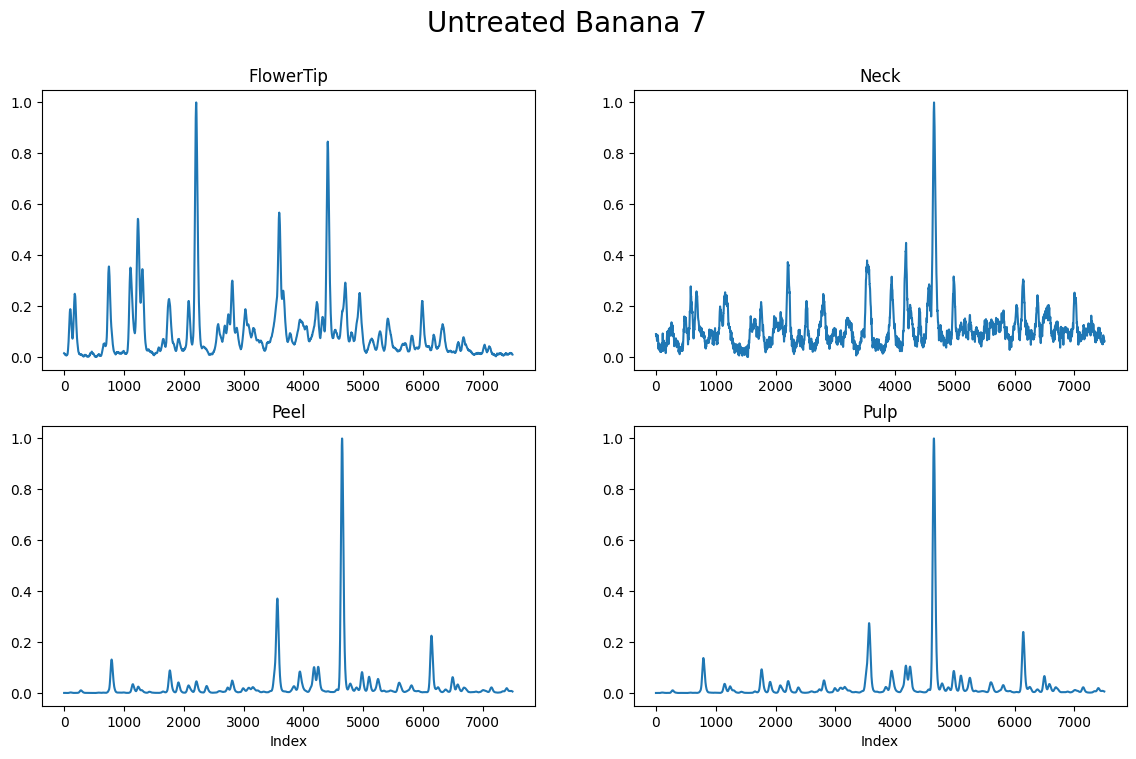

In [116]:
banana7_flowertip_untreated = normalize_data(load_data("../data/Untreated_samples/7-FlowerTip.txt"))
banana7_neck_untreated = normalize_data(load_data("../data/Untreated_samples/7-Neck.txt"))
banana7_peel_untreated = normalize_data(load_data("../data/Untreated_samples/7-Peel.txt"))
banana7_pulp_untreated = normalize_data(load_data("../data/Untreated_samples/7-Pulp.txt"))

plot_4_signals(banana7_flowertip_untreated, banana7_neck_untreated, banana7_peel_untreated, banana7_pulp_untreated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Untreated Banana 7')

#### Banana 8

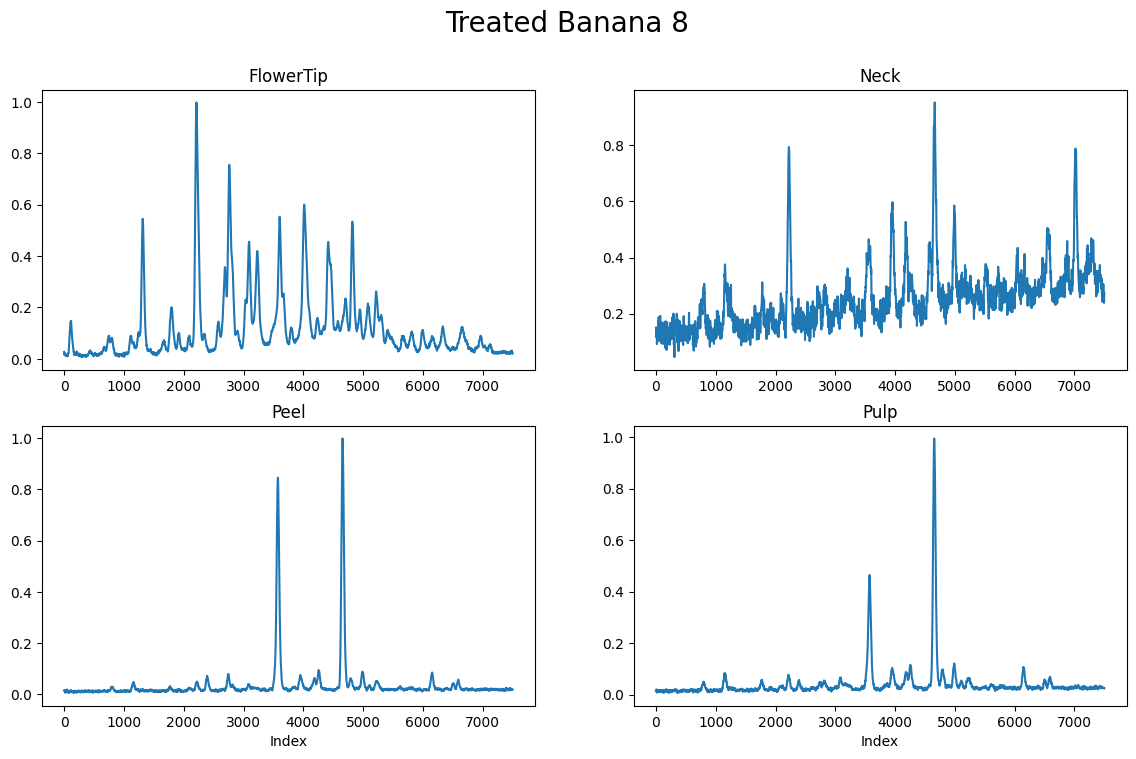

In [117]:
banana8_flowertip_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/8-FlowerTip-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/8-FlowerTip-2.txt")),
    normalize_data(load_data("../data/Treated_samples/8-FlowerTip-3.txt")))

banana8_neck_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/8-Neck-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/8-Neck-2.txt")),
    normalize_data(load_data("../data/Treated_samples/8-Neck-3.txt")))

banana8_peel_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/8-Peel-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/8-Peel-2.txt")),
    normalize_data(load_data("../data/Treated_samples/8-Peel-3.txt")))

banana8_pulp_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/8-Pulp-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/8-Pulp-2.txt")),
    normalize_data(load_data("../data/Treated_samples/8-Pulp-3.txt")))

plot_4_signals(banana8_flowertip_treated, banana8_neck_treated, banana8_peel_treated, banana8_pulp_treated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Treated Banana 8')

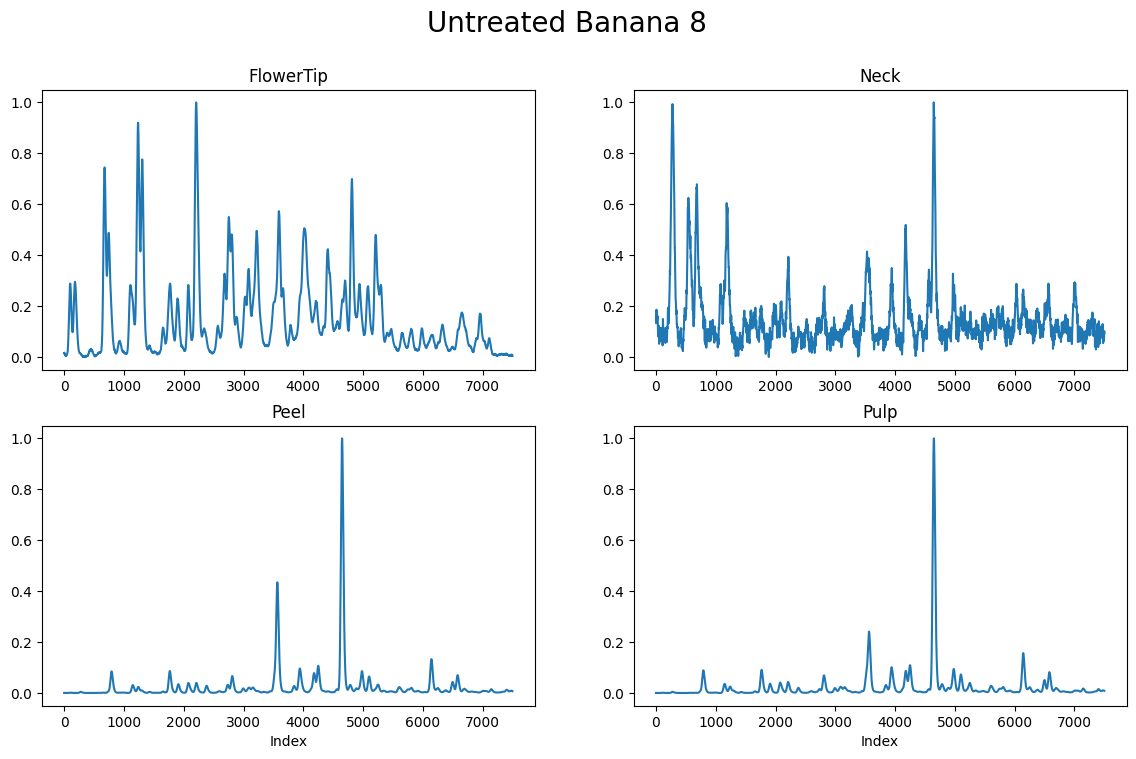

In [118]:
banana8_flowertip_untreated = normalize_data(load_data("../data/Untreated_samples/8-FlowerTip.txt"))
banana8_neck_untreated = normalize_data(load_data("../data/Untreated_samples/8-Neck.txt"))
banana8_peel_untreated = normalize_data(load_data("../data/Untreated_samples/8-Peel.txt"))
banana8_pulp_untreated = normalize_data(load_data("../data/Untreated_samples/8-Pulp.txt"))

plot_4_signals(banana8_flowertip_untreated, banana8_neck_untreated, banana8_peel_untreated, banana8_pulp_untreated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Untreated Banana 8')

#### Banana 9

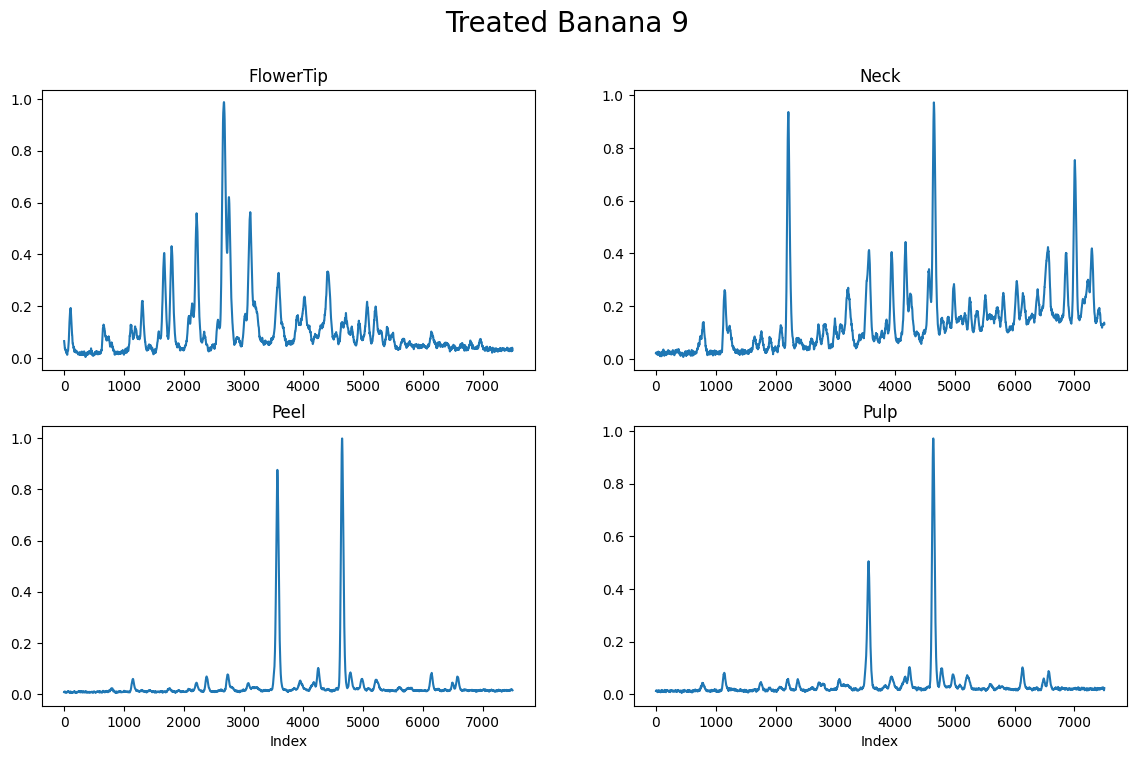

In [119]:
banana9_flowertip_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/9-FlowerTip-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/9-FlowerTip-2.txt")),
    normalize_data(load_data("../data/Treated_samples/9-FlowerTip-3.txt")))

banana9_neck_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/9-Neck-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/9-Neck-2.txt")),
    normalize_data(load_data("../data/Treated_samples/9-Neck-3.txt")))

banana9_peel_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/9-Peel-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/9-Peel-2.txt")),
    normalize_data(load_data("../data/Treated_samples/9-Peel-3.txt")))

banana9_pulp_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/9-Pulp-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/9-Pulp-2.txt")),
    normalize_data(load_data("../data/Treated_samples/9-Pulp-3.txt")))

plot_4_signals(banana9_flowertip_treated, banana9_neck_treated, banana9_peel_treated, banana9_pulp_treated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Treated Banana 9')

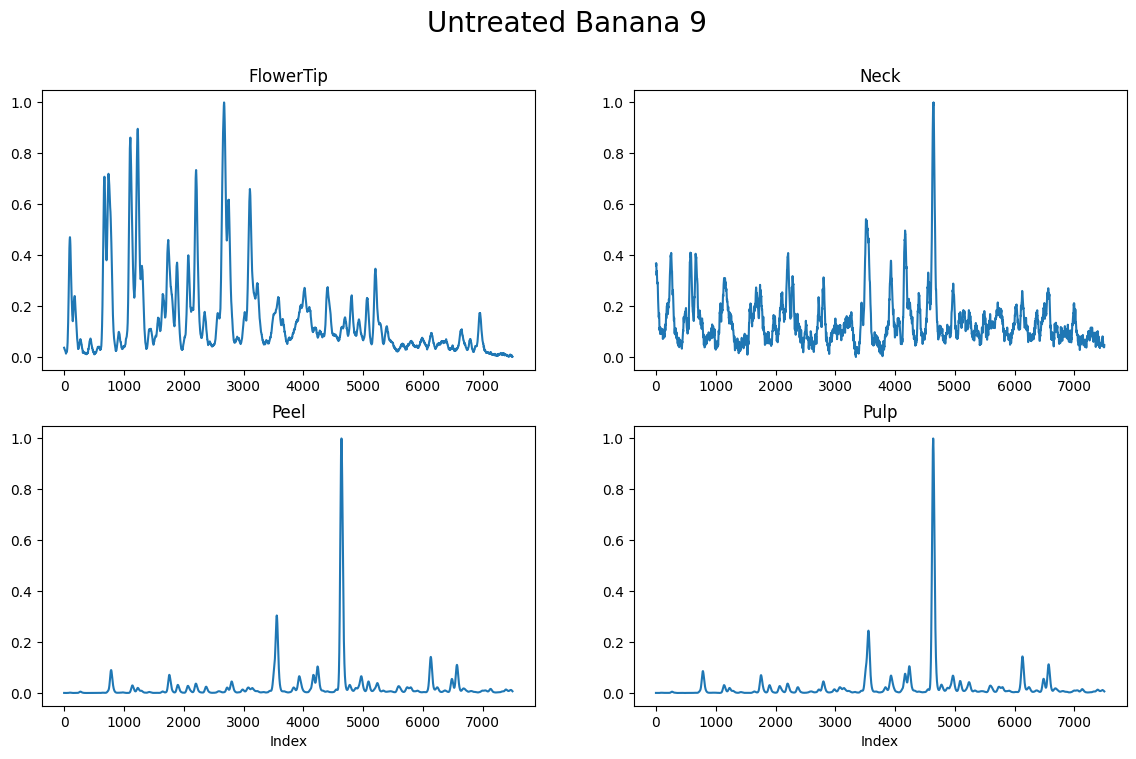

In [120]:
banana9_flowertip_untreated = normalize_data(load_data("../data/Untreated_samples/9-FlowerTip.txt"))
banana9_neck_untreated = normalize_data(load_data("../data/Untreated_samples/9-Neck.txt"))
banana9_peel_untreated = normalize_data(load_data("../data/Untreated_samples/9-Peel.txt"))
banana9_pulp_untreated = normalize_data(load_data("../data/Untreated_samples/9-Pulp.txt"))

plot_4_signals(banana9_flowertip_untreated, banana9_neck_untreated, banana9_peel_untreated, banana9_pulp_untreated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Untreated Banana 9')

#### Banana 10

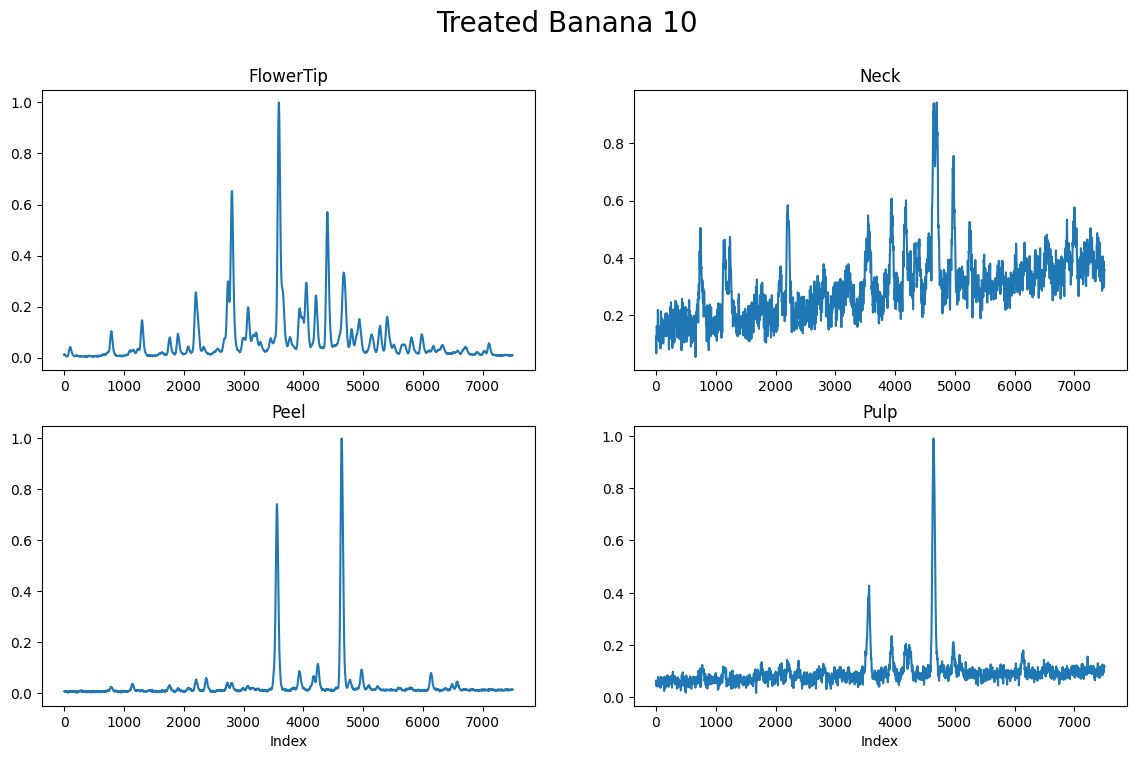

In [121]:
banana10_flowertip_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/10-FlowerTip-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/10-FlowerTip-2.txt")),
    normalize_data(load_data("../data/Treated_samples/10-FlowerTip-3.txt")))

banana10_neck_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/10-Neck-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/10-Neck-2.txt")),
    normalize_data(load_data("../data/Treated_samples/10-Neck-3.txt")))

banana10_peel_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/10-Peel-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/10-Peel-2.txt")),
    normalize_data(load_data("../data/Treated_samples/10-Peel-3.txt")))

banana10_pulp_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/10-Pulp-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/10-Pulp-2.txt")),
    normalize_data(load_data("../data/Treated_samples/10-Pulp-3.txt")))

plot_4_signals(banana10_flowertip_treated, banana10_neck_treated, banana10_peel_treated, banana10_pulp_treated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Treated Banana 10')

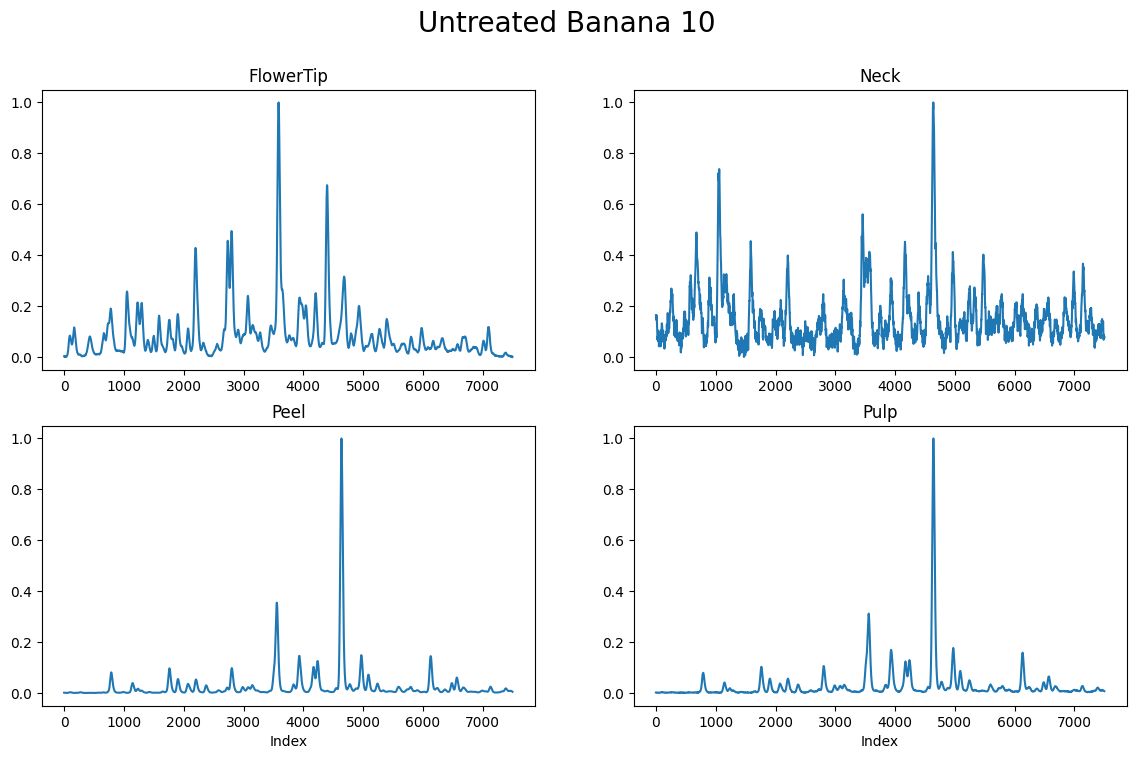

In [122]:
banana10_flowertip_untreated = normalize_data(load_data("../data/Untreated_samples/10-FlowerTip.txt"))
banana10_neck_untreated = normalize_data(load_data("../data/Untreated_samples/10-Neck.txt"))
banana10_peel_untreated = normalize_data(load_data("../data/Untreated_samples/10-Peel.txt"))
banana10_pulp_untreated = normalize_data(load_data("../data/Untreated_samples/10-Pulp.txt"))

plot_4_signals(banana10_flowertip_untreated, banana10_neck_untreated, banana10_peel_untreated, banana10_pulp_untreated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Untreated Banana 10')

### Clusters identification

Our primary objective in this project is to establish two distinct clusters of bananas. One cluster will represent the Plátano de Canarias variety, while the other will represent all other varieties.

To achieve this, we will employ the KMeans algorithm, a popular unsupervised machine learning technique used for clustering. KMeans works by partitioning the data into a specified number of clusters (in our case, two), each represented by a centroid, in such a way that the sum of the squared distances from each data point to its nearest centroid is minimized.

In [152]:
def process_and_plot_clusters(signals, number_of_clusters=2, random_state=24, max_iter=500, title=None):
    """
    Process signals, apply KMeans clustering, and plot the resulting clusters.

    The function combines the input signals, applies KMeans clustering, and plots each cluster in a separate subplot.
    It also calculates and prints the silhouette coefficient for the clustering.

    Parameters:
    signals (list of pd.DataFrame): The list of pandas DataFrames representing the signals to process.
    number_of_clusters (int, optional): The number of clusters to form. Default is 2.
    random_state (int, optional): Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. Default is 16.
    max_iter (int, optional): Maximum number of iterations of the k-means algorithm for a single run. Default is 500.
    title (str, optional): The title of the plot. Default is None.

    Returns:
    cluster1, cluster2 (list): Lists containing the column names of the signals in each cluster.
    silhouette (float): The silhouette coefficient of the clustering.
    """
    treated_flowertip = combine_signals(signals)
    treated_flowertip.columns = range(1, len(treated_flowertip.columns) + 1)

    column_names = treated_flowertip.columns

    treated_flowertip = treated_flowertip.T.to_numpy().reshape(-1, treated_flowertip.shape[0])

    kmeans = KMeans(n_clusters=number_of_clusters, random_state=random_state, max_iter=max_iter)
    kmeans.fit(treated_flowertip)

    cluster_assignments = kmeans.predict(treated_flowertip)

    unique_clusters = np.unique(cluster_assignments)
    fig, axs = plt.subplots(len(unique_clusters), 1, figsize=(10, 10))
    fig.suptitle(title)

    cluster1 = []
    cluster2 = []

    for i, cluster in enumerate(unique_clusters):
        indices = np.where(cluster_assignments == cluster)[0]
        cluster_data = treated_flowertip[indices]

        for j, signal in enumerate(cluster_data):
            label = f'Signal {column_names[indices[j]]}'
            axs[i].plot(signal, label=label, color=f'C{j}')

            if cluster == 0:
                cluster1.append(column_names[indices[j]])
            elif cluster == 1:
                cluster2.append(column_names[indices[j]])

        axs[i].set_title(f'Cluster {cluster + 1}')
        axs[i].legend()

    plt.show()
    
    silhouette = silhouette_score(treated_flowertip, cluster_assignments)
    print(f"Silhouette Coefficient: {round(silhouette, 5)}")

    return cluster1, cluster2, silhouette

## Results & Discussion

Now that We gathered the data and plotted the chromatograms for each banana sample, we can proceed with the clustering analysis. The following plots will show for each banana sample the two clusters identified by the KMeans algorithm (for the treated and untreated groups) and specify the silhouette score, a metric used to evaluate the quality of the clustering (ranging from -1 to 1, with 1 indicating the best clustering).

### Flower tip

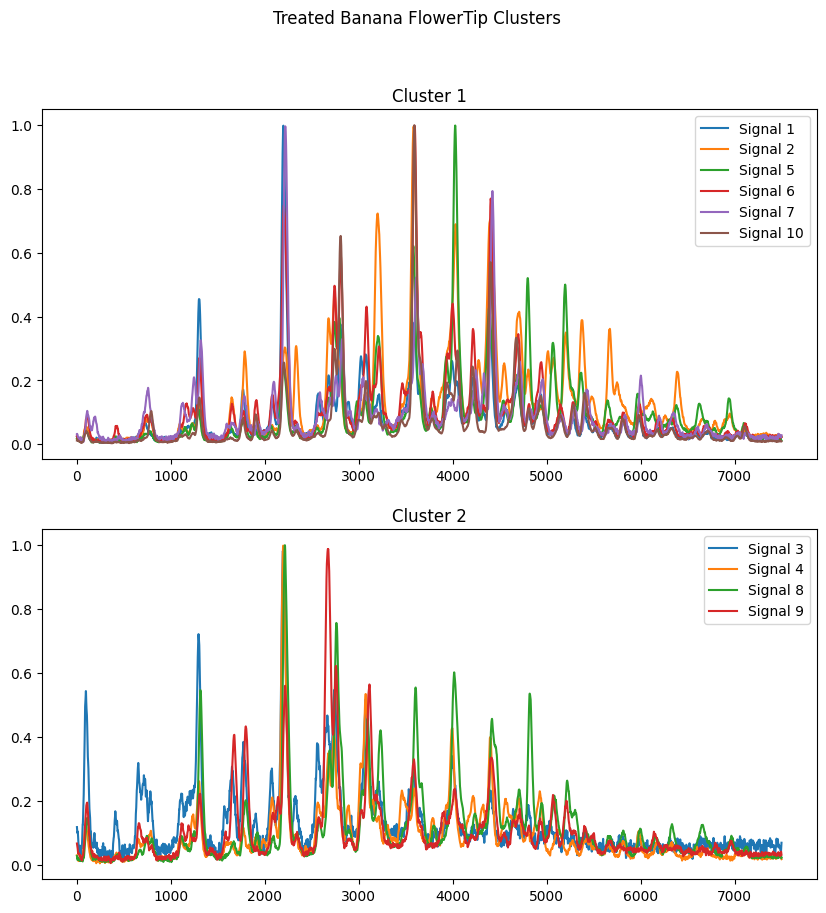

Silhouette Coefficient: 0.09828


In [153]:
flowertip_cluster1_treated, flowertip_cluster2_treated, flowertip_treated_silhouette = process_and_plot_clusters([banana1_flowertip_treated, banana2_flowertip_treated, banana3_flowertip_treated, banana4_flowertip_treated, banana5_flowertip_treated, banana6_flowertip_treated, banana7_flowertip_treated, banana8_flowertip_treated, banana9_flowertip_treated, banana10_flowertip_treated], title='Treated Banana FlowerTip Clusters')

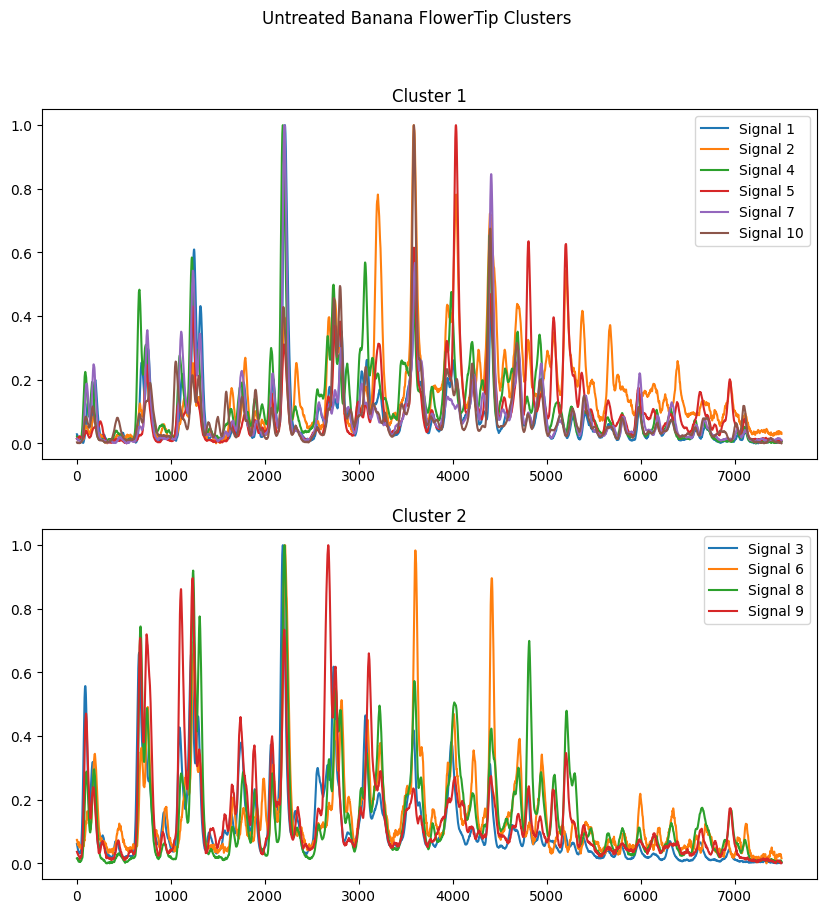

Silhouette Coefficient: 0.10547


In [154]:
flowertip_cluster1_untreated, flowertip_cluster2_untreated, flowertip_untreated_silhouette = process_and_plot_clusters([banana1_flowertip_untreated, banana2_flowertip_untreated, banana3_flowertip_untreated, banana4_flowertip_untreated, banana5_flowertip_untreated, banana6_flowertip_untreated, banana7_flowertip_untreated, banana8_flowertip_untreated, banana9_flowertip_untreated, banana10_flowertip_untreated], title='Untreated Banana FlowerTip Clusters')

### Neck

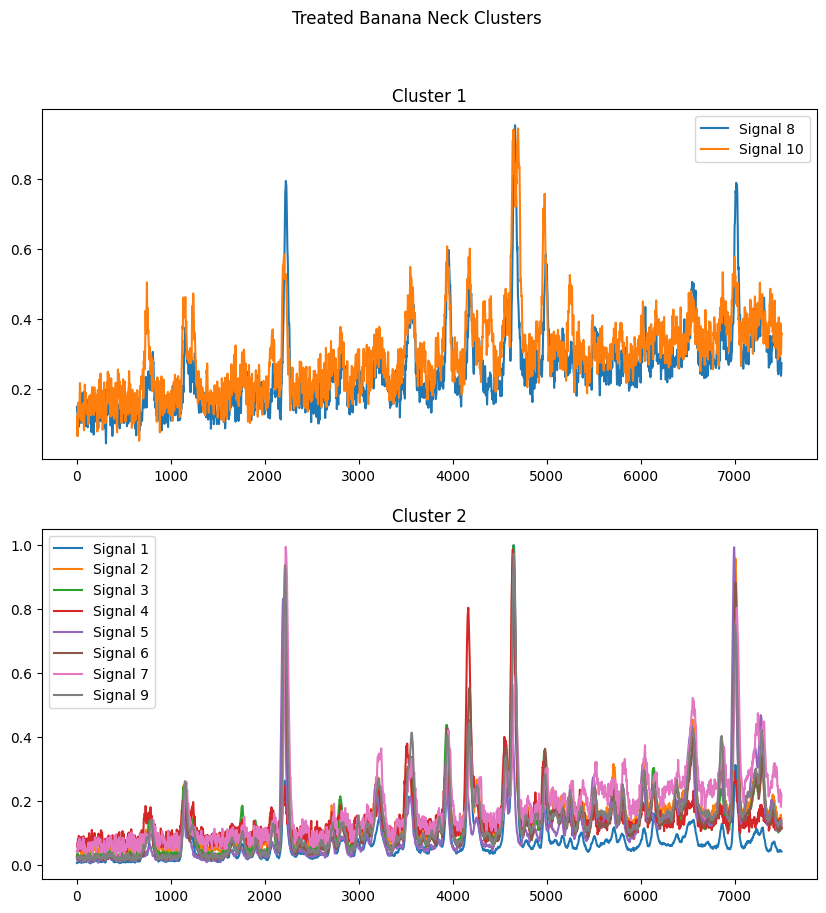

Silhouette Coefficient: 0.4839


In [155]:
neck_cluster1_treated, neck_cluster2_treated, neck_treated_silhouette = process_and_plot_clusters([banana1_neck_treated, banana2_neck_treated, banana3_neck_treated, banana4_neck_treated, banana5_neck_treated, banana6_neck_treated, banana7_neck_treated, banana8_neck_treated, banana9_neck_treated, banana10_neck_treated], title='Treated Banana Neck Clusters')

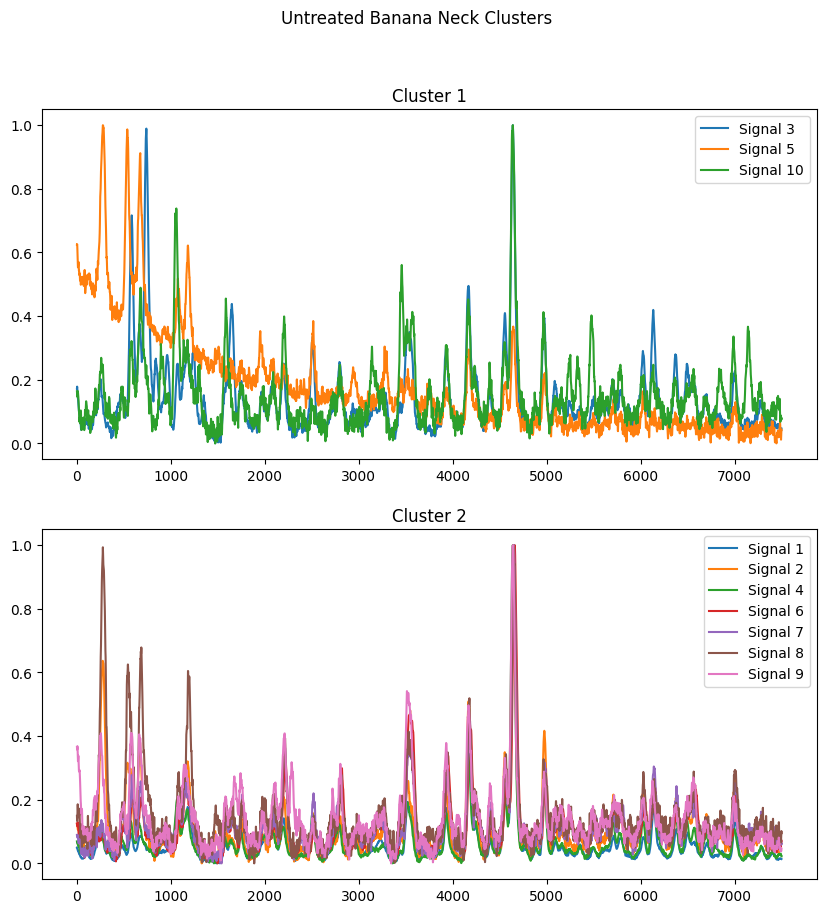

Silhouette Coefficient: 0.22268


In [156]:
neck_cluster1_untreated, neck_cluster2_untreated, neck_untreated_silhouette = process_and_plot_clusters([banana1_neck_untreated, banana2_neck_untreated, banana3_neck_untreated, banana4_neck_untreated, banana5_neck_untreated, banana6_neck_untreated, banana7_neck_untreated, banana8_neck_untreated, banana9_neck_untreated, banana10_neck_untreated], title='Untreated Banana Neck Clusters')

### Peel

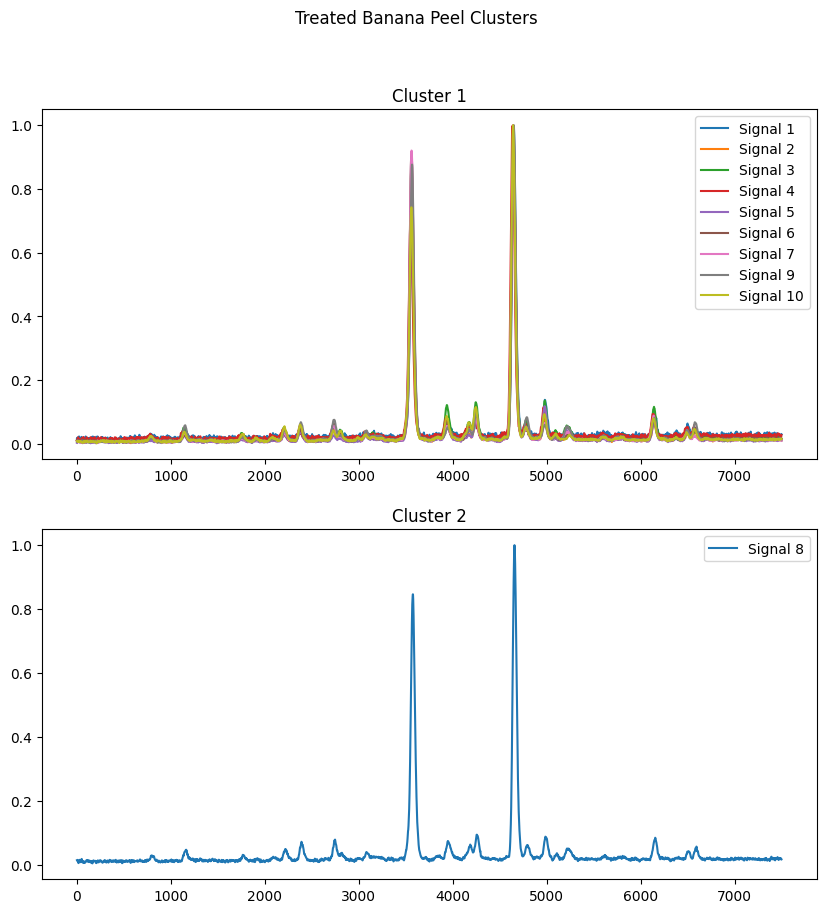

Silhouette Coefficient: 0.43871


In [157]:
peel_cluster1_treated, peel_cluster2_treated, peel_treated_silhouette = process_and_plot_clusters([banana1_peel_treated, banana2_peel_treated, banana3_peel_treated, banana4_peel_treated, banana5_peel_treated, banana6_peel_treated, banana7_peel_treated, banana8_peel_treated, banana9_peel_treated, banana10_peel_treated], title='Treated Banana Peel Clusters')

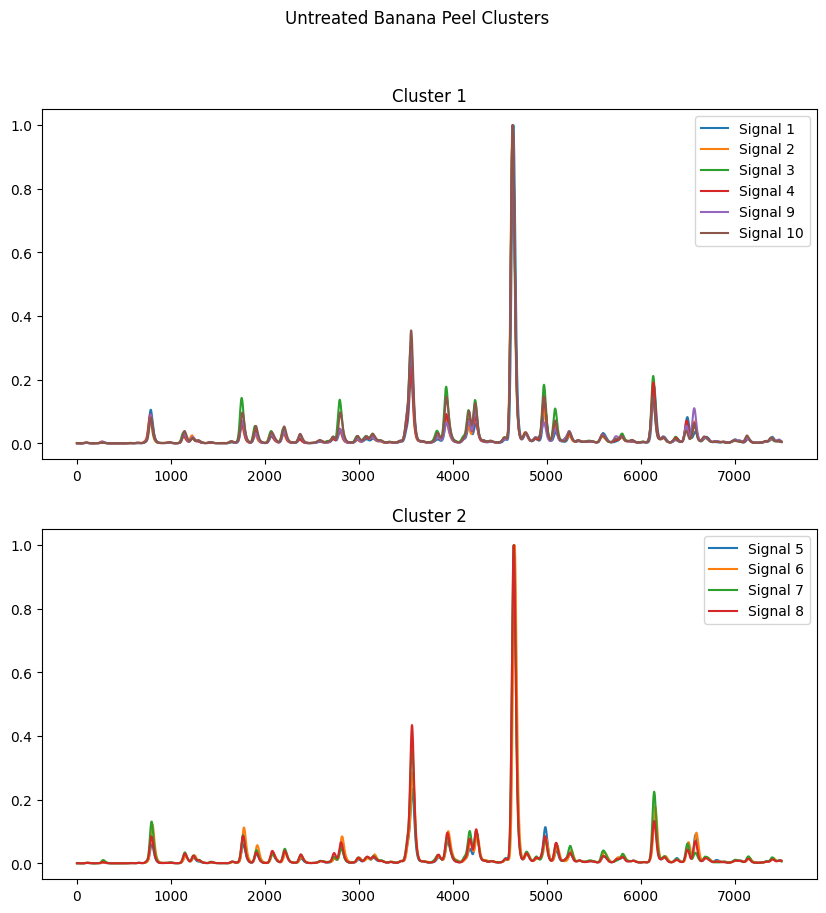

Silhouette Coefficient: 0.48009


In [158]:
peel_cluster1_untreated, peel_cluster2_untreated, peel_untreated_silhouette = process_and_plot_clusters([banana1_peel_untreated, banana2_peel_untreated, banana3_peel_untreated, banana4_peel_untreated, banana5_peel_untreated, banana6_peel_untreated, banana7_peel_untreated, banana8_peel_untreated, banana9_peel_untreated, banana10_peel_untreated], title='Untreated Banana Peel Clusters')

### Pulp

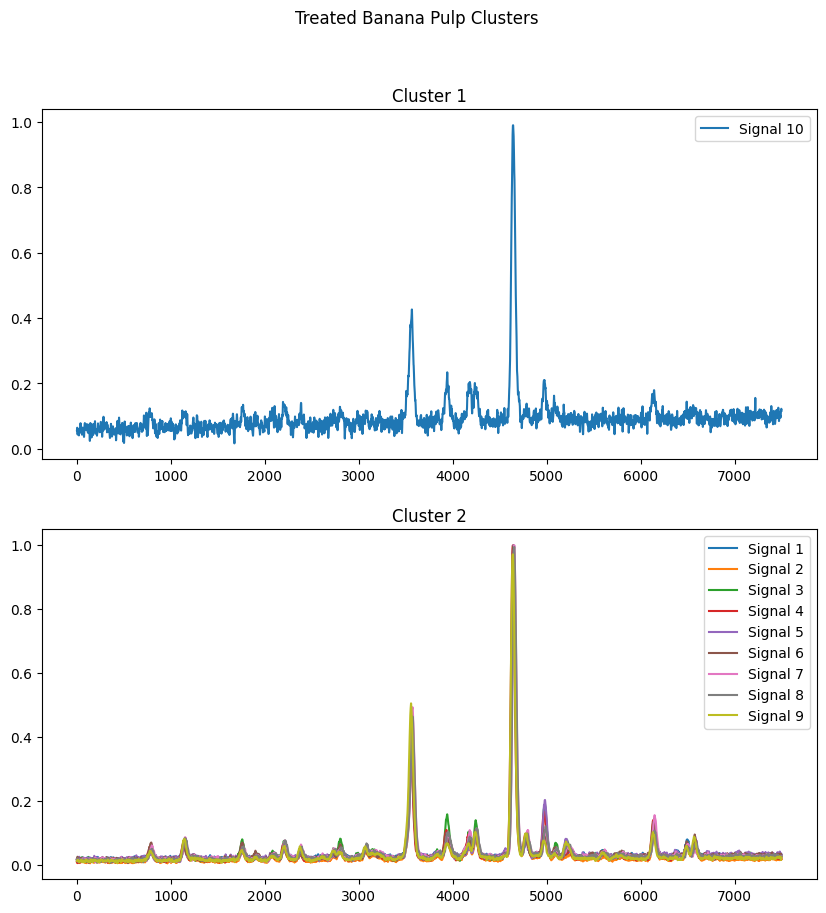

Silhouette Coefficient: 0.57572


In [159]:
pulp_cluster1_treated, pulp_cluster2_treated, pulp_treated_silhouette = process_and_plot_clusters([banana1_pulp_treated, banana2_pulp_treated, banana3_pulp_treated, banana4_pulp_treated, banana5_pulp_treated, banana6_pulp_treated, banana7_pulp_treated, banana8_pulp_treated, banana9_pulp_treated, banana10_pulp_treated], title='Treated Banana Pulp Clusters')

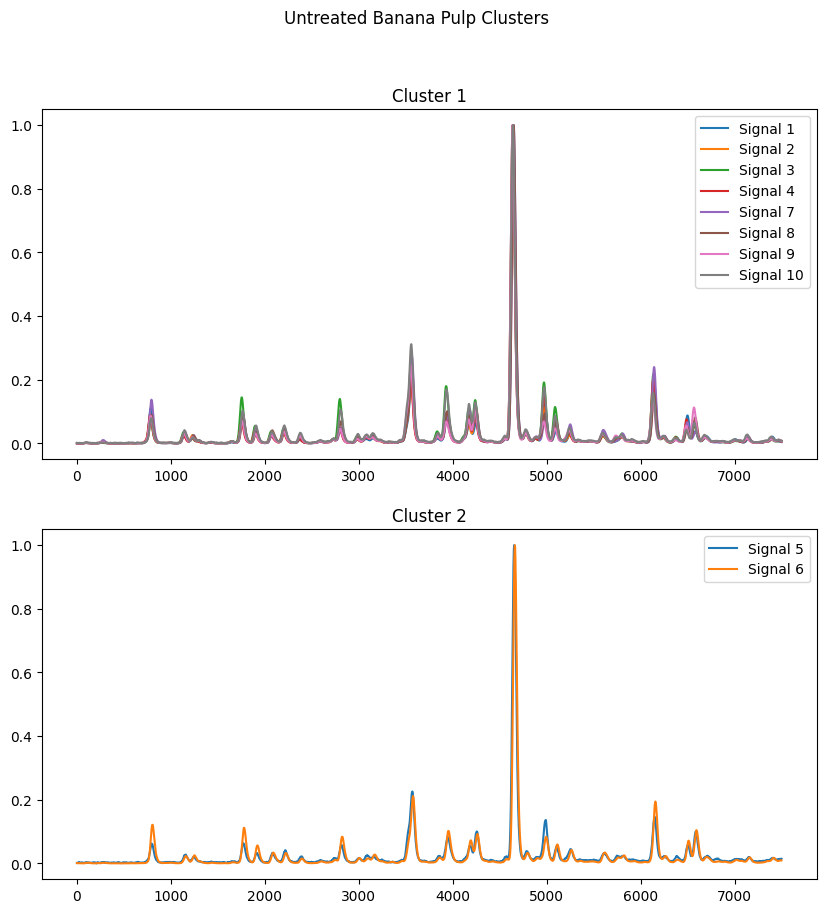

Silhouette Coefficient: 0.42651


In [160]:
pulp_cluster1_untreated, pulp_cluster2_untreated, pulp_untreated_silhouette = process_and_plot_clusters([banana1_pulp_untreated, banana2_pulp_untreated, banana3_pulp_untreated, banana4_pulp_untreated, banana5_pulp_untreated, banana6_pulp_untreated, banana7_pulp_untreated, banana8_pulp_untreated, banana9_pulp_untreated, banana10_pulp_untreated], title='Untreated Banana Pulp Clusters')

### Final results

After analyzing the clustering results for each part of the banana samples, we can conclude that the KMeans algorithm did not achieve to identify two distinct clusters for the treated and untreated samples. The silhouette scores were low for all samples, indicating that the clustering was not successful. Though we will use the frequency of each banana into the clusters to determine potentials final clusters.

In [161]:
def final_partition(cluster1_lists, cluster2_lists):
    cluster1_counter = Counter()
    cluster2_counter = Counter()

    for lst in cluster1_lists:
        cluster1_counter.update(lst)

    for lst in cluster2_lists:
        cluster2_counter.update(lst)

    final_cluster1 = []
    final_cluster2 = []

    for banana in set(cluster1_counter.keys()).union(cluster2_counter.keys()):
        if cluster1_counter[banana] >= cluster2_counter[banana]:
            final_cluster1.append(banana)
        else:
            final_cluster2.append(banana)

    return final_cluster1, final_cluster2

#### Treated clusters

In [162]:
cluster1_lists = [flowertip_cluster1_treated, neck_cluster1_treated, peel_cluster1_treated, pulp_cluster1_treated]
cluster2_lists = [flowertip_cluster2_treated, neck_cluster2_treated, peel_cluster2_treated, pulp_cluster2_treated]

final_cluster1, final_cluster2 = final_partition(cluster1_lists, cluster2_lists)
print(f"Final Cluster 1: {final_cluster1}")
print(f"Final Cluster 2: {final_cluster2}")

Final Cluster 1: [1, 2, 5, 6, 7, 10]
Final Cluster 2: [3, 4, 8, 9]


#### Untreated clusters

In [163]:
cluster1_lists = [flowertip_cluster1_untreated, neck_cluster1_untreated, peel_cluster1_untreated, pulp_cluster1_untreated]
cluster2_lists = [flowertip_cluster2_untreated, neck_cluster2_untreated, peel_cluster2_untreated, pulp_cluster2_untreated]

final_cluster1, final_cluster2 = final_partition(cluster1_lists, cluster2_lists)
print(f"Final Cluster 1: {final_cluster1}")
print(f"Final Cluster 2: {final_cluster2}")

Final Cluster 1: [1, 2, 3, 4, 5, 7, 9, 10]
Final Cluster 2: [6, 8]


### Samples impact comparison

We will now try to understand which part of the banana had a significant impact on the clustering results. We will compare the silhouette scores for each part of the banana samples to identify the most relevant one for both treated and untreated samples.

In [164]:
def plot_silhouettes(treated_samples, untreated_samples):
    labels = ['Flowertip', 'Neck', 'Peel', 'Pulp']

    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    axs[0].bar(labels, treated_samples)
    axs[0].set_title('Treated Samples')
    axs[0].set_ylabel('Silhouette Coefficient')

    axs[1].bar(labels, untreated_samples)
    axs[1].set_title('Untreated Samples')
    axs[1].set_ylabel('Silhouette Coefficient')

    plt.tight_layout()
    plt.show()

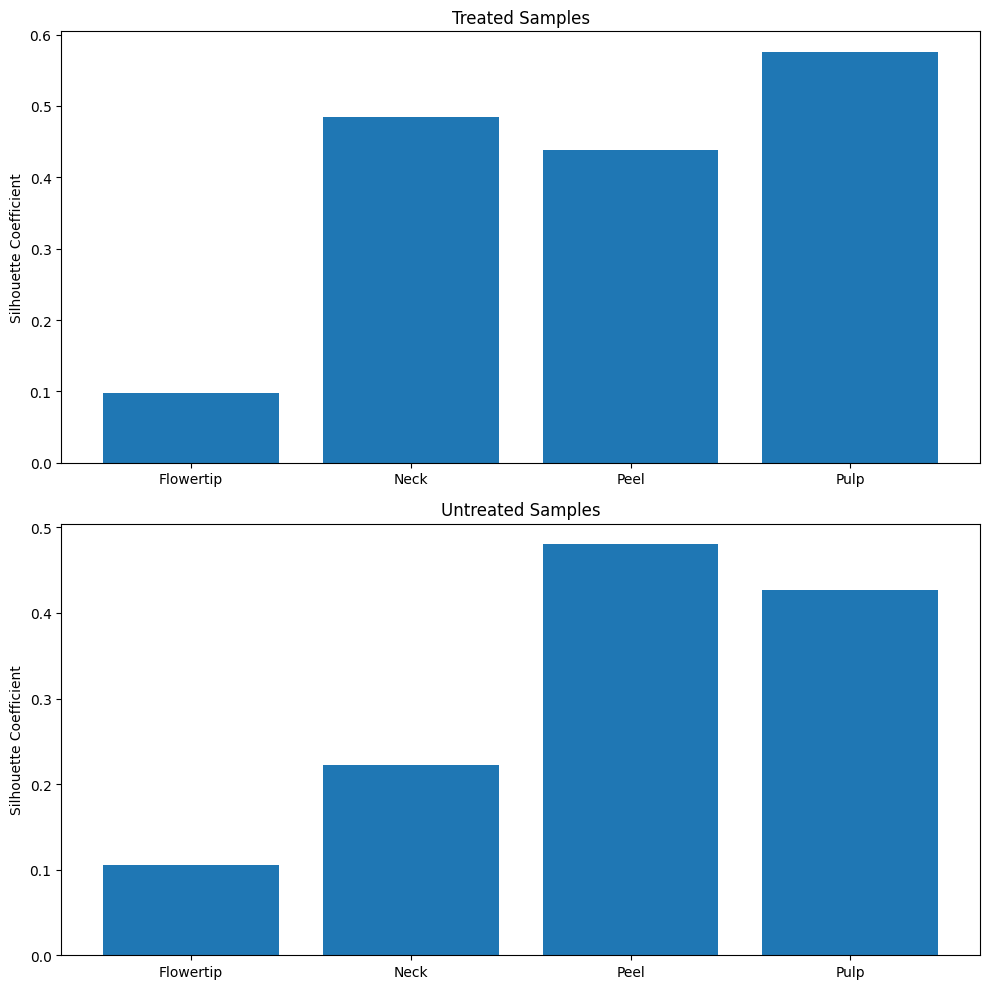

In [165]:
treated_samples = [flowertip_treated_silhouette, neck_treated_silhouette, peel_treated_silhouette, pulp_treated_silhouette]
untreated_samples = [flowertip_untreated_silhouette, neck_untreated_silhouette, peel_untreated_silhouette, pulp_untreated_silhouette]

plot_silhouettes(treated_samples, untreated_samples)

## Conclusion

## References